# NB: NumPy Continued



## Quick Refresher on Shape

The **shape** of an array is represented a **tuple**, e.g. `(n, m)` for a 2D array.

* The **length** of the tuple is number of **dimensions** (i.e. axes).
* The **values** of the tuple are the number of **elements** in each dimension (axis).

Consider the array `foo`:

In [3]:
import numpy as np

In [4]:
foo = np.ones((6,4))

In [5]:
foo

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

It was created with the $2$ dimensions.
* The first dimension, axis 0, has $6$ elements. In this case, these elements are arrays.
* The second dimension, axis 1, has $4$ elements. Its elements are scalars (numbers in this case).

The shape of `foo[0]` is $4$. It contains $1$ axis with $4$ elements.

In [6]:
foo[0], foo[0].shape

(array([1., 1., 1., 1.]), (4,))

It has a shape of $1$ and not $4 \times 1$ because it is a vector, not a matrix.

**SO, there is a difference between a vector and a 1-column matrix.**

### Reshaping

If we want to make it into a 1-column matrix, we need to reshape it using `np.reshape()`.

Note that the first value of the shape argument is $-1$. This means use the length of the vector that is passed to it. 

In [7]:
## np.reshape?

In [8]:
foo2 = np.reshape(foo[0], (-1, 1))

In [9]:
foo2, foo2.shape

(array([[1.],
        [1.],
        [1.],
        [1.]]),
 (4, 1))

When indexing an array, think of the **positions** of the comma-delimitted tuple as the axis.  

The **values** are the **element offsets** in the containing array. The

In [10]:
foo[2:, 2:]
##   ^   ^ 
##   0   1  <- AXIS NUMBER

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

### Example: The Normal Equation

Sometimes, you need to convert vectors into 1-column matrices to make certain linear algebraic functions work.

Consider two random variables, $x$ and $y$. 

In [11]:
x = np.random.randn(100)
y = np.random.randn(100)

We can fit a regression line using the **normal equation**, which appears in this week's homework.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Here is a standward way of expressing it in NumPy:

In [12]:
get_beta1 = lambda x, y: (np.linalg.inv(x.T.dot(x))) * (x.T.dot(y))

However, it will fail if we pass it our two variables, `x` and `y`.

The reason is that it expects `x` to be a matrix, since it is designed to handle n-dimension predictor variables, usually represented as $\textbf{X}$. 

In [13]:
get_beta1(x, y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

The revised function will work with a vector as `x`:

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

In [14]:
get_beta2 = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [15]:
get_beta2(x, y)

0.11041207961950944

We can fix the problem in the general case by converting our vector into a matrix using `np.reshape()`.

In [16]:
x_as_matrix = np.reshape(x, (-1, 1))

In [17]:
get_beta1(x_as_matrix, y)

array([[0.11041208]])

In [18]:
get_beta1(x_as_matrix, y)[0][0]

0.11041207961950944

In [19]:
get_beta1(x_as_matrix, y)[0][0] == get_beta2(x, y)

True

One **take-away** here is that there is a difference betweek a scalar value and a 1 x 1 array.

## Broadcasting

What happens when you try to perform an element-wise operation on two arrays of different shape?

NumPy will convert a low-dimensional array into a high-dimensional array to allow the operation to take place.

This is called **broadcasting**.

Let's look at at our array `foo`:

In [20]:
foo

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

If we multiply it by 5, the scalar is converted into an array of the same shape as `foo` with the value 5 broadcast to populate the entire array.

In [21]:
foo * 5

array([[5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.]])

If we want to multiply an array by a vector, the vector is broadcast to become a 2D array.

In [22]:
foo * np.array([5, 10, 6, 8])

array([[ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.]])

Note that NumPy can't always make the adjustment:

In [23]:
foo * np.array([5, 10])

ValueError: operands could not be broadcast together with shapes (6,4) (2,) 

## Array-Oriented Programming

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions **without writing loops**. 

This practice of **replacing explicit loops with array expressions** is referred to by some people as **vectorization**. 

Vectorized array operations are often significantly **faster** than their pure Python equivalents.

They are also **visually concise and elegant**, although loops have the virtue of visualizing what's under the hood in an algorithm.

## Expressing Conditional Logic as Array Operations

### `np.where()`

The `np.where` function is a vectorized version of the ternary expression `x if condition else y`. 

Suppose we had a boolean array and two arrays of values:

In [24]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [25]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [26]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Here is the vectorized version:

In [27]:
result = np.where(cond, xarr, yarr)

In [28]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [29]:
arr = np.random.randn(4, 4)

In [30]:
arr

array([[-0.88630252, -0.4316629 ,  0.91857064,  1.54427479],
       [ 1.23012002, -0.5420457 ,  1.11781845,  0.74700946],
       [-0.38446538,  1.50870904,  1.22148745,  1.23121864],
       [-1.60047673,  0.51294354, -1.21148778, -0.46633731]])

In [31]:
arr > 0

array([[False, False,  True,  True],
       [ True, False,  True,  True],
       [False,  True,  True,  True],
       [False,  True, False, False]])

In [32]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2, -2,  2,  2],
       [-2,  2,  2,  2],
       [-2,  2, -2, -2]])

In [33]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.88630252, -0.4316629 ,  2.        ,  2.        ],
       [ 2.        , -0.5420457 ,  2.        ,  2.        ],
       [-0.38446538,  2.        ,  2.        ,  2.        ],
       [-1.60047673,  2.        , -1.21148778, -0.46633731]])

## Mathematical and Statistical Methods

Statistical computations are aggregate functions apply to vectors within an array.

In a 2D array, they can be applied to rows or columns, i.e. **axis $0$ or axis $1$**.

Let's create an array of random values. We can think of it is a table of observations and random variables.

In [34]:
arr = np.random.randn(5, 4)

In [35]:
arr

array([[-0.56379909,  0.63920648,  0.87248354, -0.02845294],
       [-0.63524983,  1.08505079,  0.75671762,  0.50280784],
       [-0.0142165 ,  2.35391876,  0.70430055, -0.43817457],
       [-1.55291148, -0.54403408, -0.70309266, -1.28928976],
       [ 0.5977512 , -0.10197554, -0.3362719 ,  0.66716004]])

### `.mean()`

In [36]:
arr.mean()

0.09859642340859656

In [37]:
np.mean(arr)

0.09859642340859656

In [38]:
arr.mean(axis=1)

array([ 0.2298595 ,  0.4273316 ,  0.65145706, -1.02233199,  0.20666595])

In [39]:
arr.mean(axis=0)

array([-0.43368514,  0.68643328,  0.25882743, -0.11718988])

### `.sum()`

In [40]:
arr.sum()

1.9719284681719313

Row wise aggregration

In [41]:
arr.sum(axis=0)

array([-2.1684257 ,  3.4321664 ,  1.29413716, -0.58594939])

In [42]:
arr.mean(axis=1)

array([ 0.2298595 ,  0.4273316 ,  0.65145706, -1.02233199,  0.20666595])

Column-wise aggregration

### `.cumsum()`

In [43]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [44]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [45]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [46]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [48]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## Methods for Boolean Arrays

### `.sum()`

Since booleans are $0$s and $1$, we can sum them to get a total truth count.

In [49]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

53

In [50]:
bools = np.array([False, False, True, False])

### `.any()`

In [51]:
bools.any()

True

### `.all()`

In [52]:
bools.all()

False

## Sorting 

### `.sort()`

In [53]:
arr = np.random.randn(6)

In [54]:
arr

array([-0.34100777, -0.47902669, -0.04914749, -0.2118817 ,  0.33189994,
        0.44421597])

In [55]:
arr.sort()

In [56]:
arr

array([-0.47902669, -0.34100777, -0.2118817 , -0.04914749,  0.33189994,
        0.44421597])

In [57]:
arr = np.random.randn(5, 3)

In [58]:
arr

array([[-0.22477078, -0.2655815 ,  1.61483759],
       [ 1.85270888,  0.75707369,  0.79857461],
       [ 0.37555699,  0.53462432, -1.04191359],
       [-0.49741696, -0.10138164, -0.02289091],
       [ 0.54096651, -0.16458838, -1.56101135]])

In [59]:
arr.sort(1)

In [60]:
arr

array([[-0.2655815 , -0.22477078,  1.61483759],
       [ 0.75707369,  0.79857461,  1.85270888],
       [-1.04191359,  0.37555699,  0.53462432],
       [-0.49741696, -0.10138164, -0.02289091],
       [-1.56101135, -0.16458838,  0.54096651]])

In [61]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6010598458046106

In [62]:
0.05 * len(large_arr)

50.0

## Unique and Other Set Logic

### `np.unique()`

In [63]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [64]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [65]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

### `np.in1d()`

Tests whether each element of a 1-D array is also present in a second array.

In [66]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays

### `np.save()`

Save an array to a binary file in NumPy ``.npy`` format.

Automatically adds the `.npy` file extension.

In [67]:
arr = np.arange(10)
np.save('some_array', arr)

### `np.load()`

In [68]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `np.savetxt()`

Save an array to a text file.

In [69]:
## np.savetxt?

In [70]:
np.savetxt('some_array.txt', arr)

In [71]:
## !more some_array.txt

### `np.savez()`

Save several arrays into a single file in uncompressed ``.npz`` format.

In [72]:
np.savez('array_archive.npz', a=arr, b=arr)

In [73]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

Clean up ...

In [75]:
!rm some_array.npy
!rm some_array.txt
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

### `.dot()`

Dot product of two arrays. Specifically,
- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).
- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using `matmul()` or `a @ b` is preferred.
- If either `a` or `b` is 0-D (scalar), it is equivalent to `multiply()`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.
- If `a` is an N-D array and `b` is an M-D array (where `M>=2`), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`:
  
```
    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
```

In [76]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [77]:
x, y

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 6., 23.],
        [-1.,  7.],
        [ 8.,  9.]]))

In [78]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [79]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [80]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [81]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In NumPy, the `@` operator means [matrix multiplication](https://www.codingem.com/numpy-at-operator/).

In [82]:
x @ np.ones(3)

array([ 6., 15.])

### `np.linalg.inv()`

In [83]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 0.28589415,  0.01354928,  0.05104531,  0.10897255, -0.24099955],
       [ 0.01354928,  0.57348664, -0.75620929,  0.39037647,  0.05308586],
       [ 0.05104531, -0.75620929,  1.26083704, -0.63901115, -0.32228738],
       [ 0.10897255,  0.39037647, -0.63901115,  0.59380515,  0.2750746 ],
       [-0.24099955,  0.05308586, -0.32228738,  0.2750746 ,  1.73940389]])

In [84]:
mat.dot(inv(mat))
q, r = qr(mat)

In [85]:
r

array([[ -7.46075356,   3.45484673,   5.55222932,   6.40262089,
         -1.19957391],
       [  0.        , -10.63504229,  -6.77474252,   0.46167086,
         -1.06575636],
       [  0.        ,   0.        ,  -2.09192461,  -3.350628  ,
          0.0985176 ],
       [  0.        ,   0.        ,   0.        ,  -1.1296096 ,
          0.29129928],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.55334319]])

## Pseudorandom Number Generation

### `np.random.normal()`

In [86]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.28326902, -0.69810988, -0.28288633,  0.52776027],
       [ 0.32479475, -0.56073919, -1.76436199,  0.59315203],
       [-2.46989275,  1.45445243, -0.00357062,  1.36447415],
       [-0.21189878, -0.40942508,  0.33629503, -0.69962928]])

In [88]:
from random import normalvariate

N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

899 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.9 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [89]:
np.random.seed(1234)

In [90]:
rng = np.random.RandomState(1234)

In [91]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### Example: Random Walks

Let simulate a random walk. The walk will be represented as a vector.

We'll do it first as loop, then with vectorization.

**Loops**

In [92]:
import random
position = 0
walk = [position] # initialize the walk
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # Coin toss
    position += step
    walk.append(position)

In [93]:
import matplotlib.pyplot as plt

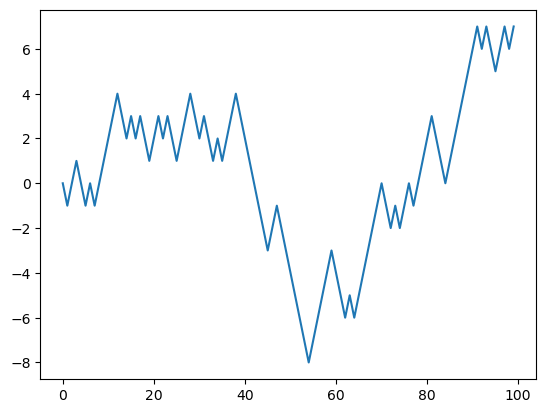

In [94]:
plt.figure()
plt.plot(walk[:100]);

**Vectors**

In [95]:
np.random.seed(12345)

In [96]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk2 = steps.cumsum()

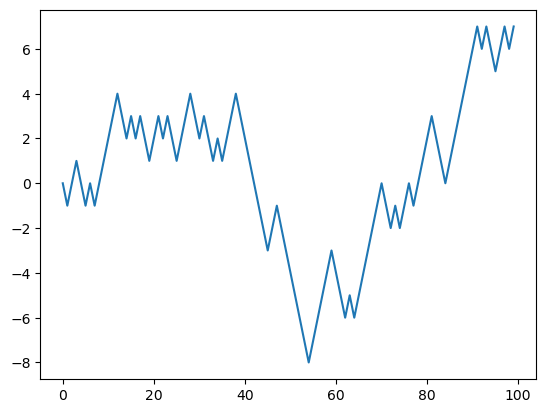

In [97]:
plt.plot(walk[:100]);

In [98]:
walk2.min(), walk2.max()

(-3, 31)

### Simulating Many Random Walks at Once

In [99]:
nwalks = 5000
nsteps = 1000

In [100]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [101]:
draws

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [102]:
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [103]:
walks.max(), walks.min()

(138, -133)

In [104]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [105]:
hits30.sum() # Number that hit 30 or -30

3410

In [106]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [107]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [108]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # Walks: observations, Steps: features

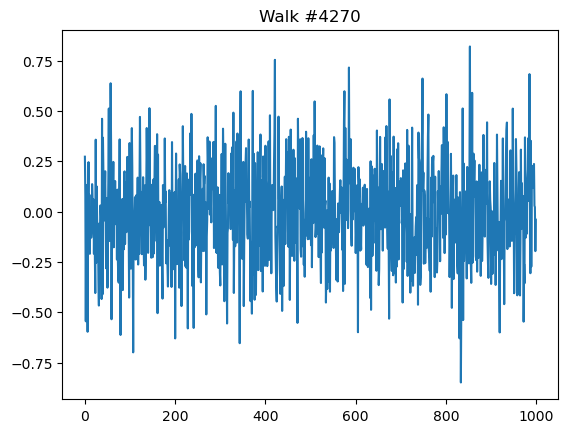

In [109]:
sample_walk = np.random.choice(len(draws))
plt.plot(draws[sample_walk])
plt.title(f"Walk #{sample_walk}");